# STUDY 1: The disparity between exchange and bookmaker starting prices.


### Study assumption
Exchange starting prices (BSP) offer value prices compared to bookmaker starting prices (ISP). 

### Data used
BSP & ISP data from November 2020 - November 2022.


### Introduction

The following exploratory data analysis is
focused on analysing starting prices in the horse racing
markets of the UK and Ireland.

Starting price (SP) refers to the price of an outcome once
an event has begun. Although a bet can be placed at SP
before an event starts, the exact SP is only calculated once
it has started. Typically, the starting price is either identical
or very similar to the price offered just before an event
(such as football match, horse race) starts. In the UK and
Ireland horse racing markets, there are two primary
suppliers of starting prices: 

#### ISP (Industry Starting Price)
Represents the average starting price offered by the largest
bookmakers, such as Bet365 and Ladbrokes. Bookmakers
who provide SP/ISP act as the counterparty to bets placed
with them, including additional margins on top of the prices
they offer to ensure their profitability. By offering slightly
worse odds than expected, bookmakers guarantee
themselves a long-term profit regardless of the outcome of individual bets.

#### BSP (Betfair Exchange Starting Price)
Represents the starting price offered by the Betfair Exchange.
In contrast to bookmakers, exchanges such as Betfair Exchange operate
as peer-to-peer markets, where bettors are matched with
other independent parties, and prices are determined by
supply and demand. The exchange takes a commission on
profits and/or losses, ranging from 2-10% depending on the
account level and success. 

### Key Findings

- BSP prices are more accurate compared to ISP prices at every price range and race type.
- The price range of odds offered impacted the return on investment for both ISP and BSP, with ISP prices significantly more affected by increases in price.This is in part due to ISP prices rarely reaching levels over 250, with a maximum price of 501, compared to BSP prices which often rise to their maximum starting price of 1000. 
- Exchange commission has minimal effect on long term ROI compared to ISP market margins. 

### EDA

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import warnings

In [2]:
warnings.filterwarnings("ignore")
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set(rc={'figure.figsize':(2.5,1.5)})
sns.set_style("white")
sns.set_color_codes("deep")

In [3]:
title_font = {'family': 'Trebuchet MS', 'weight': 'semibold', 'size': 5, 'color': 'dimgrey'}
label_font = {'family': 'Trebuchet MS', 'size': 4, 'color': 'dimgrey'}

In [4]:
cols=[ 'date', 'time', 'runners', 'name','fave_bsp', 'position', 'bsp', 'bspr_nc', 'bspr', 'isp', 'ispr']

df = pd.read_csv('data/2020-2022_Data.csv', low_memory=False, usecols=cols)

In [5]:
df.head()

,date,name,time,bsp,isp,runners,position,fave_bsp,bspr,bspr_nc,ispr
0,01/11/2020,Get On John,13:05,309.36,101.00,9.0,9.0,0.0,-1.0,-1.0,-1.0
1,01/11/2020,Tupelo Mississippi,13:05,2.72,2.62,9.0,2.0,1.0,-1.0,-1.0,-1.0
2,01/11/2020,Stitch Up,13:05,723.73,151.00,9.0,7.0,0.0,-1.0,-1.0,-1.0
3,01/11/2020,Wagner,13:05,5.29,4.33,9.0,5.0,0.0,-1.0,-1.0,-1.0
4,01/11/2020,Luca Brasis Boy,13:05,387.68,126.00,9.0,6.0,0.0,-1.0,-1.0,-1.0


### Which of BSP and ISP offer more favorable prices for placing bets in the market?

To begin, we will compare the outcomes of betting on every single starting price offered by bookmaker (ISP)
and exchange (BSP) prices. A point refers to a single stake (or ‘bet’). If you were to place a £1 bet at odds of 4.0, if your bet was to
win the result of the bet would be +3 points (stake + winnings) whereas if it were to lose the result would be -1 point.

`lineplot` showing the running point outcomes of the three different prices.

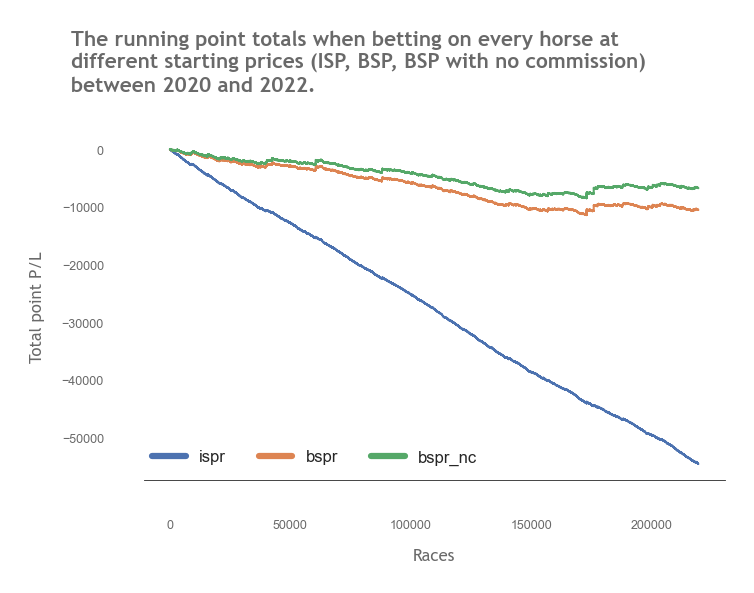

In [6]:
# data
data = df.loc[:, ['ispr', 'bspr', 'bspr_nc']].reset_index(drop=True).cumsum()

# create the figure and axes
fig, ax = plt.subplots()

# plot lineplot
sns.lineplot(data=data, dashes=False,  linewidth=.5, ax=ax)

# set title and axis labels
ax.set_title('The running point totals when betting on every horse at\ndifferent starting prices (ISP, BSP, BSP with no commission)\nbetween 2020 and 2022.',
             fontdict=title_font, x=-0.125, y=1.05, ha='left')
ax.set_ylabel('Total point P/L', fontdict=label_font)
ax.set_xlabel('Races', fontdict=label_font)

# adjust axis, grid lines
sns.despine(left=True)
ax.spines['bottom'].set_linewidth(.2)

# adjust parameters
ax.tick_params(colors='dimgrey', labelsize=3)

# plot legend
plt.legend(bbox_to_anchor=(.6, 0), loc='lower right', ncol=3, fontsize=4, frameon=False)

plt.show()

In [7]:
print(f'ISP ROI = {(((df.ispr.sum()+len(df)-len(df)))/len(df)*100).round(2)}%')
print('-----------')
print(f'BSP ROI = {(((df.bspr.sum()+len(df)-len(df)))/len(df)*100).round(2)}%')
print('-----------')
print(f'BSP_nc ROI = {(((df.bspr_nc.sum()+len(df)-len(df)))/len(df)*100).round(2)}%')

ISP ROI = -24.86%
-----------
BSP ROI = -4.8%
-----------
BSP_nc ROI = -3.07%


Figure 1 shows us that there is general disparity between the accuracy of the two starting prices, next I want
to split prices into three equal terciles based on their price to analyse if price itself affects the return on investment for both ISP
and BSP prices.


In [8]:
df['price_terciles'] = pd.qcut(df["bsp"], q=3, precision=1, labels=range(1, 4))

In [9]:
df.head()

,date,name,time,bsp,isp,runners,position,fave_bsp,bspr,bspr_nc,ispr,price_terciles
0,01/11/2020,Get On John,13:05,309.36,101.00,9.0,9.0,0.0,-1.0,-1.0,-1.0,3
1,01/11/2020,Tupelo Mississippi,13:05,2.72,2.62,9.0,2.0,1.0,-1.0,-1.0,-1.0,1
2,01/11/2020,Stitch Up,13:05,723.73,151.00,9.0,7.0,0.0,-1.0,-1.0,-1.0,3
3,01/11/2020,Wagner,13:05,5.29,4.33,9.0,5.0,0.0,-1.0,-1.0,-1.0,1
4,01/11/2020,Luca Brasis Boy,13:05,387.68,126.00,9.0,6.0,0.0,-1.0,-1.0,-1.0,3


In [10]:
price_terciles = ['small', 'medium', 'big']

In [11]:
prices = {}

In [12]:
x = 0
for t in price_terciles:
    x += 1
    prices[t] = (df[df.price_terciles == x]
                 .loc[:, ['ispr', 'bspr', 'bspr_nc']]
                 .reset_index(drop=True)
                 .cumsum())

In [13]:
prices['small'].head()

,ispr,bspr,bspr_nc
0,-1.0,-1.0,-1.0
1,-2.0,-2.0,-2.0
2,-3.0,-3.0,-3.0
3,-4.0,-4.0,-4.0
4,-5.0,-5.0,-5.0


`lineplot` showing the running return on investment for various price ranges and suppliers.

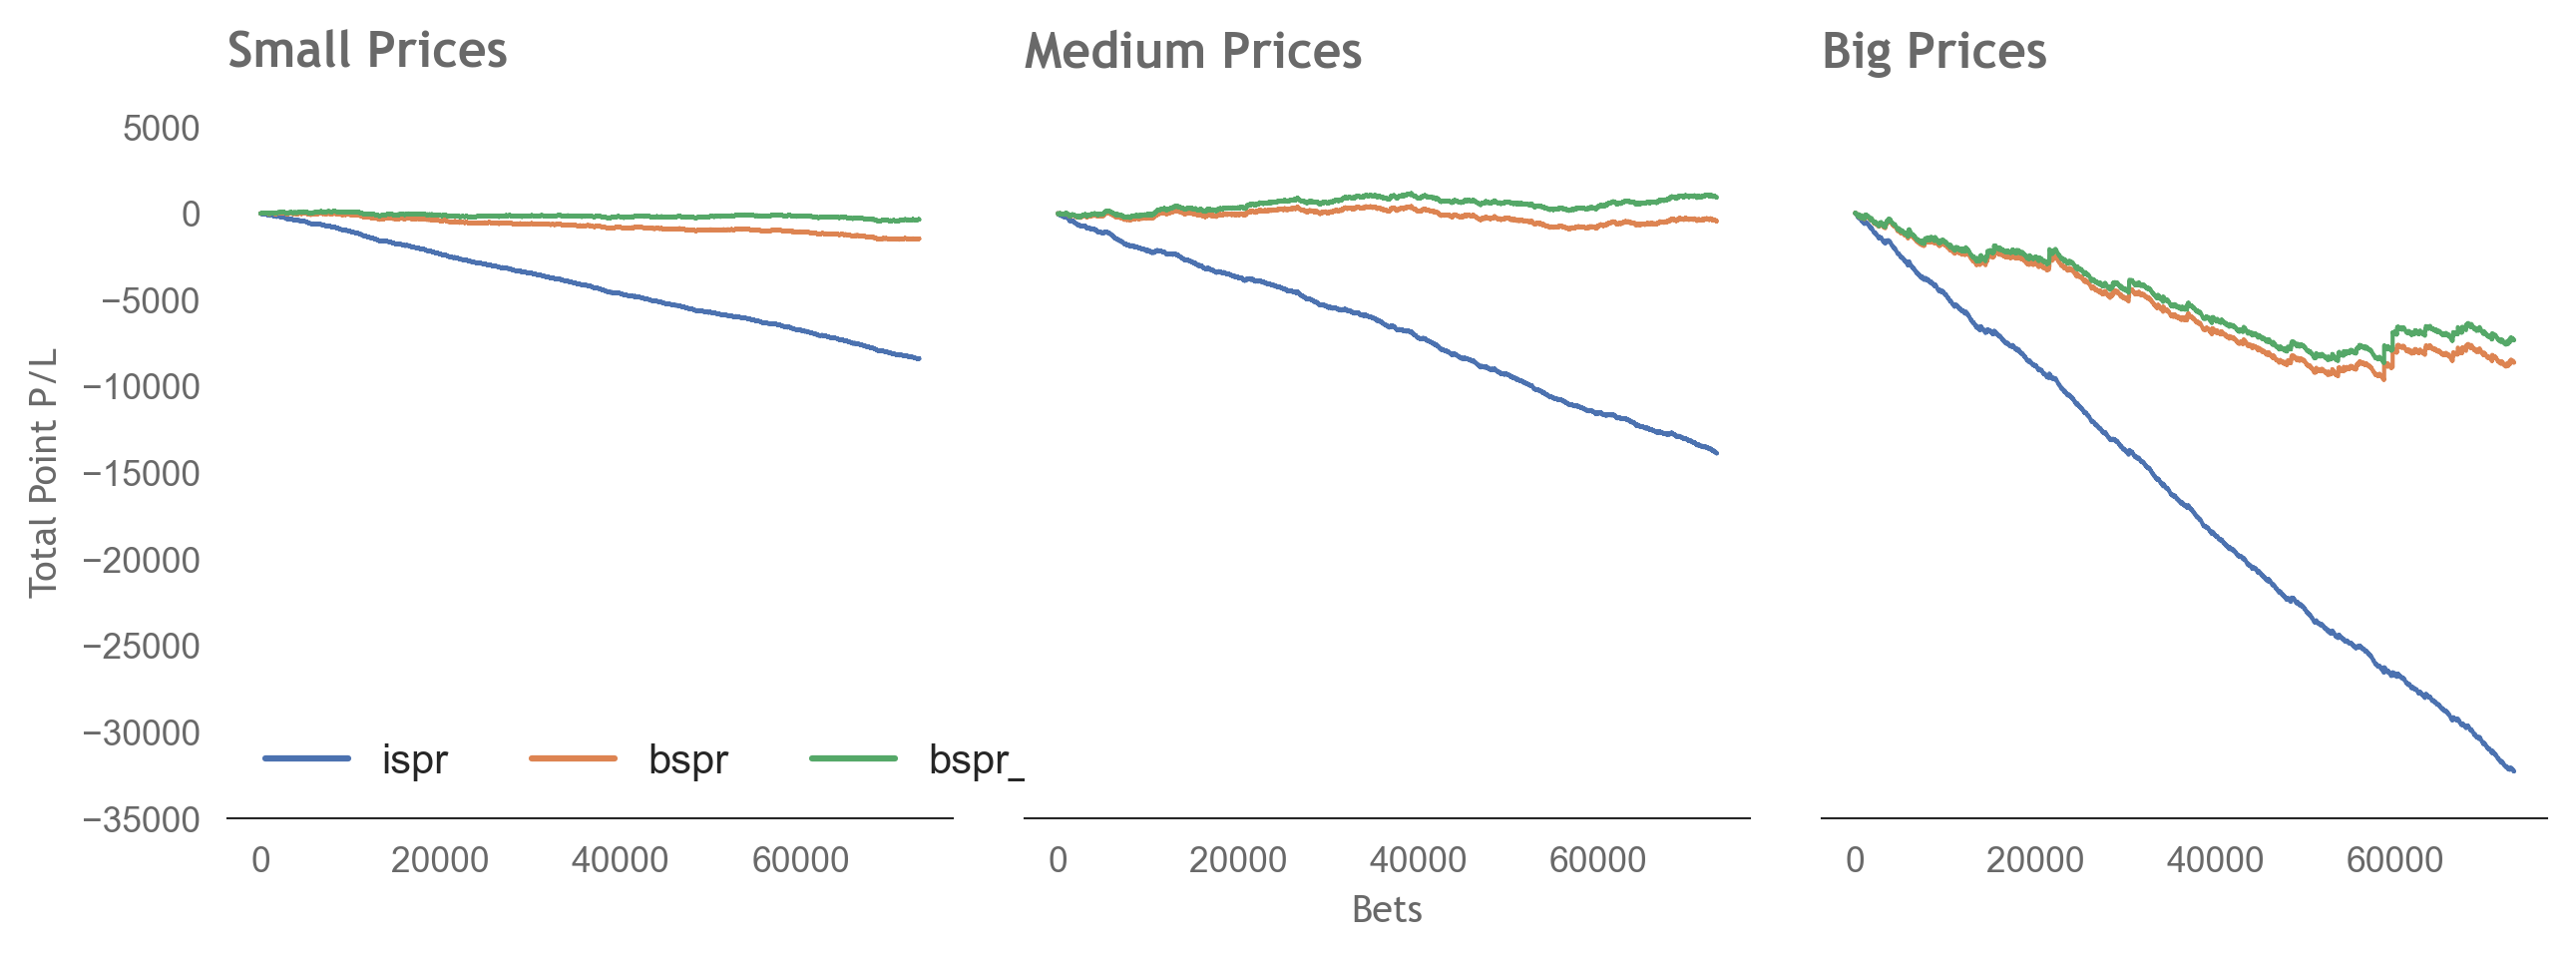

In [14]:
# create the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10,3))

# plot 1st lineplot
sns.lineplot(data=prices['small'], ax=ax1, legend=(True), dashes=False, linewidth=1)
ax1.set_title("Small Prices", fontdict=title_font, x=0, y=1.05,ha='left', color='dimgrey', fontsize=12)
ax1.set_ylabel("Total Point P/L", color='dimgrey', fontsize=9,family='Trebuchet MS')

# plot 2nd lineplot
sns.lineplot(data=prices['medium'], ax=ax2, legend=False, dashes=False, linewidth=1)
ax2.set_title("Medium Prices", fontdict=title_font, x=0, y=1.05,ha='left', color='dimgrey', fontsize=12)
ax2.set_xlabel("Bets", color='dimgrey', fontsize=9,family='Trebuchet MS')

# plot 3rd lineplot
sns.lineplot(data=prices['big'], ax=ax3, legend=False, dashes=False, linewidth=1)
ax3.set_title("Big Prices", fontdict=title_font, x=0, y=1.05,ha='left', color='dimgrey', fontsize=12)

# adjust parameters
for i in ax1, ax2, ax3:
    i.set_ylim(-35000, 5000)
    i.yaxis.set_visible(False)
    i.yaxis.set_tick_params(colors='dimgrey', labelsize=8.5, width=.25, length=3)
    i.xaxis.set_tick_params(colors='dimgrey', labelsize=8.5, width=.25, length=3)
    i.spines[['bottom', 'left']].set_linewidth(.5)
    
# adjust axis, grid lines
plt.subplots_adjust(wspace=0.1)
ax1.yaxis.set_visible(True)
sns.despine(left=True)

# plot legend
ax1.legend(bbox_to_anchor=(0, 0), loc='lower left', ncol=3, fontsize=10, frameon=False)

plt.show()

In [15]:
metrics = ['ispr', 'bspr', 'bspr_nc']

In [16]:
for p in price_terciles:
    for metric in metrics:
        roi = ((((prices[p][metric].iloc[-1] + prices[p][metric].count()) - prices[p][metric].count()) / prices[p][metric].count()) * 100).round(2)
        print(f"{metric.upper()} {p.capitalize()} ROI = {roi}%")
    print('-----------')

ISPR Small ROI = -11.48%
BSPR Small ROI = -2.0%
BSPR_NC Small ROI = -0.47%
-----------
ISPR Medium ROI = -18.97%
BSPR Medium ROI = -0.61%
BSPR_NC Medium ROI = 1.27%
-----------
ISPR Big ROI = -44.13%
BSPR Big ROI = -11.78%
BSPR_NC Big ROI = -10.02%
-----------


Figure 2 shows that return on investment decreases as prices increases. Furthermore, the difference between
BSP and ISP in ROI also grows with price.


Next we will examine the impact of price increases on the difference between ISP and BSP. For
example, if the ISP is 100 and the corresponding BSP is 300
the ‘Difference in Price (% change) would be 3. This
will give further insight into the reason behind the trend shown in Figure 2.


`scatterplot` showing the difference between the BSP and ISP (removing anomalies with a `Difference in Price (% change)` value of 20 or higher.)

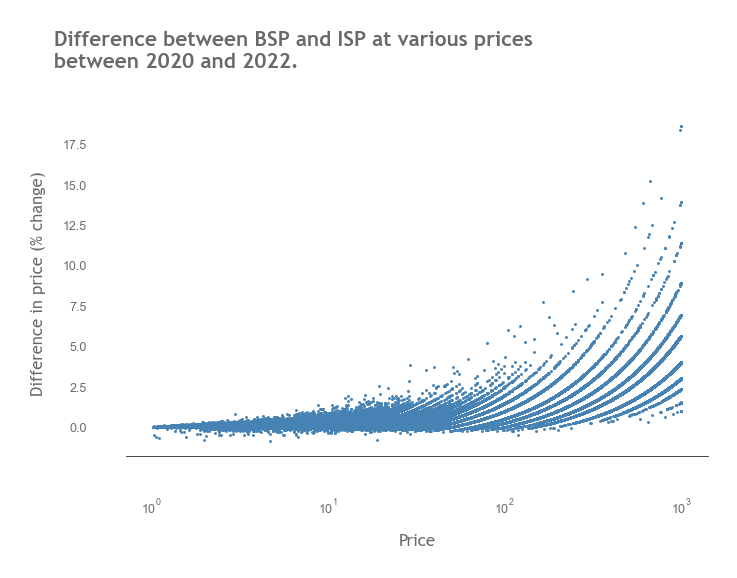

In [17]:
#data
compare_isp_bsp_diff = (df
                        .loc[:, ['bsp', 'isp']]
                        .assign(diff=(df[['isp', 'bsp']].pct_change(axis=1)['bsp']))
                        .drop(columns='isp')
                        .query('diff<20')
                        .rename(columns=({'bsp': 'Price', 'diff': 'Difference in Price (% change)'})))

# create the figure and axes
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_xscale("log")

# plot scatterplot
sns.scatterplot(x='Price', y='Difference in Price (% change)', data=compare_isp_bsp_diff, linewidth=0, s=.5, color='steelblue', ax=ax)

# set title and axis labels
ax.set_title('Difference between BSP and ISP at various prices\nbetween 2020 and 2022.',
             fontdict=title_font, x=-0.125, y=1.05, ha='left')
ax.set_ylabel('Difference in price (% change)', fontdict=label_font)
ax.set_xlabel('Price', fontdict=label_font)

# adjust axis, grid lines
sns.despine(left=True)
ax.spines['bottom'].set_linewidth(.2)

# adjust parameters
ax.tick_params(colors='dimgrey', labelsize=3)

plt.show()

In [18]:
print(f'Average ISP Small Price = {df[df.price_terciles==1].isp.mean().round(2)}')
print(f'Average BSP Small Price = {df[df.price_terciles==1].bsp.mean().round(2)}')
print('-----------')
print(f'Average ISP Medium Price = {df[df.price_terciles==2].isp.mean().round(2)}')
print(f'Average BSP Medium Price = {df[df.price_terciles==2].bsp.mean().round(2)}')
print('-----------')
print(f'Average ISP Big Price = {df[df.price_terciles==3].isp.mean().round(2)}')
print(f'Average BSP Big Price = {df[df.price_terciles==3].bsp.mean().round(2)}')

Average ISP Small Price = 4.59
Average BSP Small Price = 5.23
-----------
Average ISP Medium Price = 12.27
Average BSP Medium Price = 15.41
-----------
Average ISP Big Price = 67.99
Average BSP Big Price = 181.95


In [19]:
compare_isp_bsp_diff['Difference in Price (% change)'].corr(compare_isp_bsp_diff['Price']).round(4)

0.8433

When splitting ISP and BSP prices into 3 equal terciles, the trend of the difference between the ISP and BSP
increasing as the price increase corroborates our previous results.

To investigate the results in Figure 3 further we can look at the distribution of ISP and BSP prices
using kernel density estimation (KDE) plots.

`kdeplot` showing price distributions of prices over 100.

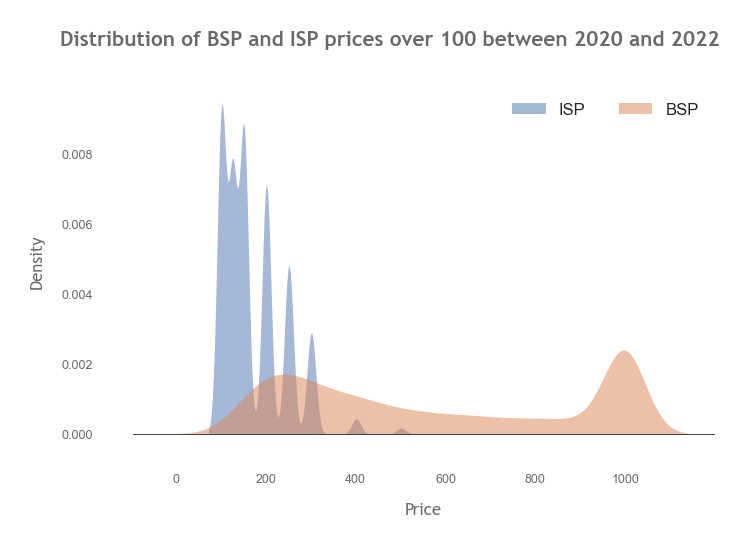

In [20]:
#data
big_prices = df[(df.isp>100)&(df.bsp>100)][['isp','bsp']].astype('int')

# create the figure and axes
fig, ax = plt.subplots()

# plot kde plots
sns.kdeplot(data=big_prices['isp'], fill=True, alpha=.5, linewidth=0, label='ISP', ax=ax)
sns.kdeplot(data=big_prices['bsp'], fill=True, alpha=.5, linewidth=0, label='BSP', ax=ax)

# set title and axis labels
ax.set_title('Distribution of BSP and ISP prices over 100 between 2020 and 2022',
             fontdict=title_font, x=-0.125, y=1.05, ha='left')
ax.set_ylabel('Density', fontdict=label_font)
ax.set_xlabel('Price', fontdict=label_font)
              
# adjust axis, grid lines
sns.despine(left=True)
ax.spines['bottom'].set_linewidth(.2)

# adjust parameters
ax.tick_params(colors='dimgrey', labelsize=3)
              
# plot legend
ax.legend(frameon=False, ncol=2, fontsize='4')

plt.show()

In [21]:
print(f'Amount of ISP Prices above 250 = {big_prices[big_prices.isp>250].count()[0]}')
print(f'Amount of BSP Prices above 250 = {big_prices[big_prices.bsp>250].count()[0]}')
print('-----------')
print(f'Mean ISP Big Price= {big_prices.isp.mean().round()}')
print(f'Mean BSP Big Price= {big_prices.bsp.mean().round()}')
print('-----------')
print(f'Max ISP Big Price = {big_prices.isp.max()}')
print(f'Max BSP Big Price = {big_prices.bsp.max()-1}')
print('-----------')
print(f'Number of ISP Max Price = {big_prices[big_prices.isp==501].count()[0]}')
print(f'Number of BSP Max Price = {big_prices[big_prices.bsp==1000].count()[0]}')

Amount of ISP Prices above 250 = 3313
Amount of BSP Prices above 250 = 12783
-----------
Mean ISP Big Price= 171.0
Mean BSP Big Price= 577.0
-----------
Max ISP Big Price = 501
Max BSP Big Price = 1000
-----------
Number of ISP Max Price = 65
Number of BSP Max Price = 3991


Figure 4 shows that BSP prices not only reach significantly higher levels than ISP, with the maximum prices
being 1000 for BSP prices and 501 for ISP prices, but also that the frequency of the highest prices occurring is much greater
when using the BSP exchange starting prices compared to the bookmaker ISP.

### Which profit method - exchange commission or bookmaker margin - has a greater impact on price?

Now that we have established the BSP exchange prices are superior to ISP bookmaker prices, let’s explore
race margins
to see if we can further support this conclusion. A higher race margin indicates worse prices and a lower longterm return on investment for betters.

`scatterplot` that reveals race margins of ISP and BSP races, which represent the total sum of implied probability of prices offered in a race. To obtain the implied probabilities, we divide the decimal odds by 100. We then group the margins by race and sum all the implied probabilities. 

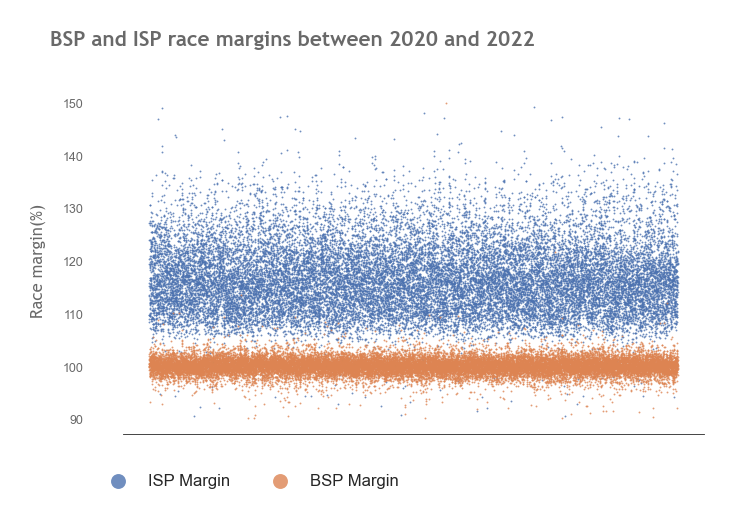

In [22]:
# data
margins = (df
           .loc[:, ['date', 'time', 'runners', 'bsp', 'isp']]
           .reset_index(drop=True)
           .assign(bsp_IP=100/df['bsp'], isp_IP=100/df['isp'])
           .groupby(['date', 'time'])
           .agg({'date': 'first', 'time': 'first', 'runners': 'first',
                 'bsp_IP': 'sum', 'isp_IP': 'sum'})
           .reset_index(drop=True)
           .reset_index()
           .query('bsp_IP > 90 & bsp_IP < 150 & isp_IP > 90 & isp_IP < 150')
           .loc[:, ['index', 'runners', 'bsp_IP', 'isp_IP']])

# create the figure and axes
fig, ax = plt.subplots()

# plot scatterplots
sns.scatterplot(x='index', y='isp_IP', data=margins, label="ISP Margin", s=.2, linewidth=0, alpha=.8, ax=ax)
sns.scatterplot(x='index', y='bsp_IP', data=margins, label="BSP Margin", s=.2, linewidth=0, alpha=.8, ax=ax)


# set title and axis labels
ax.set_title('BSP and ISP race margins between 2020 and 2022',
             fontdict=title_font, x=-0.125, y=1.05, ha='left')
ax.set_ylabel('Race margin(%)', fontdict=label_font)
ax.set_xlabel('')

# adjust axis, grid lines
sns.despine(left=True)
ax.spines['bottom'].set_linewidth(.2)

# adjust parameters
plt.xticks([], [])
ax.tick_params(colors='dimgrey', labelsize=3)

# plot legend
plt.legend(bbox_to_anchor=(0.5, -0.2), loc='lower right', ncol=2, fontsize=4, frameon=False, markerscale=8)

plt.show()

In [23]:
print(f'Average Margin of BSP Races = {margins.bsp_IP.mean().round(2)}%')
print(f'Average Margin of ISP Races = {margins.isp_IP.mean().round(2)}%')

Average Margin of BSP Races = 100.17%
Average Margin of ISP Races = 116.76%


Between 2020 and 2022, the average ISP margin was 116.72%, compared to 100.17% for Betfair
exchange market margins. These results show that on average Betfair exchange markets offer prices very close to
the true probability of the an outcome happening, resulting in more favourable prices and a higher long term
return on investment.